In [1]:
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


%matplotlib inline

In [2]:
#Number of Species
SZ = pd.read_csv('N.dat',header=None)
TN = list(SZ[0]);SN=list(SZ[1]);
#EFFORTS AND POPS
FC=glob.glob('ARR/F*')
ND=glob.glob('ARR/N*')
Fj =['ARR/F'+str(k)+'.npy' for k in range(0,len(FC),1000)]
Nj =['ARR/N'+str(k)+'.npy' for k in range(0,len(ND),1000)]

In [3]:
def fwbckbone(F,N): #Calculates the foodweb and stores is on a dataframe
    
    #Remove weak links
    F[F<=0.01] = 0.0
    #Positive Population indices
    jall = np.where(N>0)[0]
    #All positive pop indices without the external species 
    jy = jall[jall>0]     
    #Basal Species indices
    jo = np.where(F[:,0]>0.0)[0] 
    tlvs = []
    tlvs.append(jo)
    spn = False
    M=0
    #Levels
    while spn == False:
        jx = np.setdiff1d(jy,jo) #Speciesn in jy but not in jo
        ln=[]
        for q in jx:
            Un = np.where(F[q,:]>0.0)[0]
            for p in jo:
                if p in Un:
                    ln.append(q)
                    break
        ln=list(set(ln))
        tlvs.append(ln)
        un = list(jo)+ln
        jo = np.asarray(un)
        M+=1
        
        if M ==5:
            spn = True
    
    DN = []
    DR = []
    DRL = []
    for q in tlvs:
        if len(q)>0:
            Plog = np.log(1+N[q])
            Nlv = len(Plog)
            DN.append(Plog)
            DR.append(np.max(Plog))
            DRL.append(Nlv)
    ####
    Dy = np.max(DR)
    
    Xn = []; Yn = [];
    for q in range(len(DN)):
        X = [(2*j+1)*DR[q]-DR[q] for j in range(DRL[q])]
        Y = [(q+1)*6*Dy for j in range(DRL[q])]
        Xn.append(X);Yn.append(Y)

    Lmx = []    
    for q in Xn:    
        Lmx.append(q[len(q)-1])
        
    lj = np.max(Lmx)

    for q in range(len(Xn)):
        if len(Xn[q]) > 1:
            Xn[q] = [lj/Lmx[q]*k for k in Xn[q]]
    
    FW = pd.DataFrame(columns=['n','X','Y','R'])
    sn = [];xn = []; yn = []; rn = []
    for q in range(len(tlvs)):
        for p in range(len(tlvs[q])):
            sn.append(tlvs[q][p])
            xn.append(Xn[q][p])
            yn.append(Yn[q][p])
            rn.append(DN[q][p])

    FW['n'] = sn; FW['X'] = xn; FW['Y'] = yn; FW['R'] = rn
    
    tlevs = []
    for q in tlvs:
        if len(q)>0:
            tlevs.append(q)
    
    return FW, tlevs,Dy

In [4]:
def plotnets(F,FW,tlvs,N,Dyo): #Plots the foodweb
    
    circles = []
    links = []
    
    for q in range(len(tlvs)):
        for p in range(len(tlvs[q])):
            si = tlvs[q][p]
            Si = FW[FW['n']==si]
            Xi = Si['X'].values[0] 
            Yi = Si['Y'].values[0] 
            circ = plt.Circle((Xi, Yi), np.log(1+N[si]), color='lightcyan',alpha=0.5)
            #ax4.add_patch(cn)
            circles.append(circ)
            
    ######links######        
    for i in range(len(tlvs)):
    
        un = tlvs[i]
        for jn in un:
            di = FW[FW['n']==jn]
            xa = di['X'].values[0] ; ya =di['Y'].values[0];
            r = np.log(1+N[jn])  #di['R'].values[0]
            fjn=np.where(F[jn,:]>0.0)[0]  

            for kn in fjn:
                df = F[jn,kn]

                if kn==0.0:
                    xb = xa; yb= 0.0  
                    annotation = plt.annotate("",
                            xy=(xa, ya-r), xycoords='data',
                            xytext=(xb, yb), textcoords='data',
                            size=20, va="center", ha="center",
                            arrowprops=dict(arrowstyle="->",color = 'yellow',
                            connectionstyle="arc3,rad=0.0",lw=4*df,alpha=0.4))
                    links.append(annotation)
            
                else:
                    dj = FW[FW['n']==kn]
                    xb = dj['X'].values[0];
                    yb=  dj['Y'].values[0];
                    rj= np.log(1+N[kn]) #dj['R'].values[0];
                    
                    if ya == yb: 
                        if xa<xb:
                            cn = "arc3,rad=0.1"
                        else:
                            cn = "arc3,rad=-0.1"
                        xr =(xa, ya+r)
                    else:
                        cn = "arc3,rad=0.0"
                        xr=(xa, ya-r)
                        
                    annotation = plt.annotate("",
                            xy=xr, xycoords='data',         
                            xytext=(xb, yb+rj), textcoords='data',
                            size=20, va="center", ha="center",
                            arrowprops=dict(arrowstyle="->", color='yellow',
                            connectionstyle=cn,lw=4*df,alpha=0.4))
                    links.append(annotation)
                    
    return circles, links

In [5]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]


[95407.08103558] [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.] [95406.58103558 95406.68103558 95406.78103558 95406.88103558
 95406.98103558 95407.08103558 95407.18103558 95407.28103558
 95407.38103558 95407.48103558 95407.58103558]


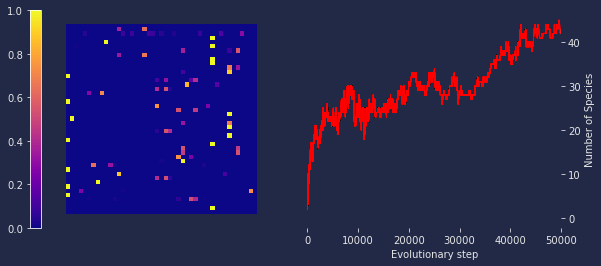

In [6]:
fig, (ax1,ax2) =  plt.subplots(1,2,figsize=(10,4))

for k in [ax1,ax2]:
    k.set_frame_on(False) 

fn = 'ARR/F0.npy' 
Fo = np.load(fn)
FN = np.zeros((70,70))
FN = Fo[0:70,0:70]

pn = 'ARR/N0.npy'
Po = np.load(pn)
Pa = Po[1:]
PN = Pa[Pa>0.0]

#hist, bins = np.histogram(np.log(1+PN), density=True)
hist, bins = np.histogram(PN, density=True)
print(PN,hist,bins)


Fm = ax1.imshow(FN,cmap='plasma')
bar = plt.colorbar(Fm,location='left') 
ax2.plot(TN,SN,'-',color='lightgray',markersize=0.6,linewidth=0.5,alpha=0.8)

mu = ax2.plot(TN[0],SN[0],'-',color='red',linewidth=0.9,alpha=0.85)

ax1.set_axis_off()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Number of Species')
ax2.set_xlabel('Evolutionary step')
ax2.set_xlim([0,50000])
#plt.subplots_adjust(wspace=1, hspace=0)
#########
lines=[]
nplot = []
def update(*args):
    n=args[0]
    
    if n!=0:
        
        #print(n)
        for line in lines:
            line.remove()
            del line
        lines[:] = []
        nplot[:] = []
        m=100*n
        line1 = ax2.vlines(m,0,SN[m],color='yellow',linestyle='--', alpha=0.9,linewidth=0.8)
        line2 = ax2.hlines(SN[m],m,500000,color='yellow',linestyle='--', alpha=0.9,linewidth=0.8)
        mu = ax2.plot(TN[0:m],SN[0:m],'-',color='red',linewidth=0.9,alpha=0.85)
        lines.append(line1)
        lines.append(line2)
        nplot.append(mu)
        
        
        fn = 'ARR/F'+str(m)+'.npy' 
        Fo = np.load(fn)
        FN = Fo[0:45,0:45]
        ax1.imshow(FN,cmap='plasma')

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=1, save_count=500)

###Animation to Html
#joy=anim.to_jshtml(fps=None, embed_frames=True, default_mode='once')
#with open('joy.html','w') as f:
#    f.write(joy)
#####################
    
joy = animation.PillowWriter(fps=15, metadata=dict(artist='Me'),bitrate=1800)
anim.save('joy.gif', writer=joy)    


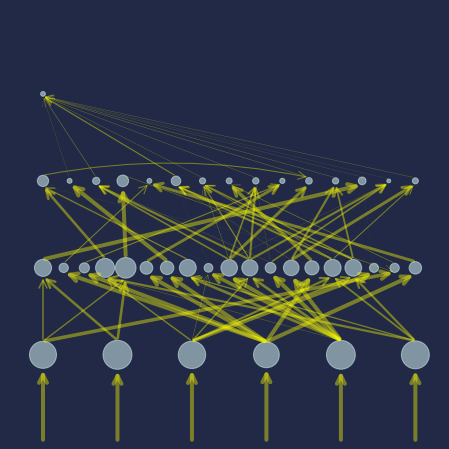

In [10]:
fig, ax2 =  plt.subplots(1,1,figsize=(8,8))
m=0     
fn = 'ARR/F'+str(m)+'.npy' 
pn = 'ARR/N'+str(m)+'.npy'
Fo = np.load(fn)
Po = np.load(pn)
Pa = Po[1:]
PN = Pa[Pa>0.0]
FW, tlvls, Dyo =  fwbckbone(Fo,Po)
cn, lk = plotnets(Fo,FW,tlvls,Po,Dyo)

circles = []
links = []

for q in cn:
    circles.append(q)
    ax2.add_patch(q)

for p in lk:
    links.append(p)
    #print(p)
ax2.axis('off')
ax2.axis('equal')
#ax2.set_ylim([0*Dyo, 4*Dyo])


def upnet(*args):
    
    n=args[0]
    if n!=0:
        #print(n)
        m=100*n
        fn = 'ARR/F'+str(m)+'.npy' 
        pn = 'ARR/N'+str(m)+'.npy'
        Fo = np.load(fn)
        Po = np.load(pn)
        FW, tlvls, Dyo =  fwbckbone(Fo,Po)
        
        for node in circles:
            node.remove()
            del node
        for link in links:
            link.remove()
            del link
            
        circles[:] = []
        links[:] = []
        Xo = np.mean(list(FW['X']))
        cn,lk = plotnets(Fo,FW,tlvls,Po,Dyo)
        
        for q in cn:
            circles.append(q)
            ax2.add_patch(q)
        for p in lk:
            links.append(p)
            #print(p)
        
        ax2.axis('off')
        ax2.set(xlim=(Xo-15*Dyo, Xo+15*Dyo), ylim=(0*Dyo, 30*Dyo))
        ax2.set_aspect('equal','box')
        #ax2.set_ylim([0*Dyo, 50*Dyo])

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, upnet,interval=1, save_count=500)
#joy=anim.to_jshtml(fps=None, embed_frames=True, default_mode='once')
#with open('fweb.html','w') as f:
#    f.write(joy)

joy = animation.PillowWriter(fps=15, metadata=dict(artist='Me'),bitrate=1800)
anim.save('fwebs.gif', writer=joy) 
        